# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

解答：1.从一个点走到另一个点的路径都是非负数 2.每次取出一个点搜索完毕后需要对路径里的节点进行排序从小到大排序（如求最短路径时候）

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

解答：迭代加深搜索：限定下界的深度优先搜索。先允许深度优先搜索K层搜索树，如果没有发现可行解，再将K+1后重复以上步骤搜索，直到搜索到可行解。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

解答：如果需要优化，选择BFS；如果对空间要求高，需要选DFS

##### 2.4 When can we use machine learning ?

解答：当需要机器来发现资料中的模式是使用机器学习，需要有数据，设计好目标函数

##### 2.5 What is the gradient of a function ?

解答：用于求解最小化预测值和实际值之间的差距的问题，对目标函数进行求导，沿着切线反方向走调整参数，可以使损失降低

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

解答：选择合适的学习率, 打乱数据顺序，对损失求平均

$$X_{new} = X_{old} - \lambda * \frac{\partial y}{\partial X_{old}}$$

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-May

# 记录

### 1.爬了网站https://www.bjsubway.com/station/xltcx/下的北京地铁线路和站点信息 
    
   + 代码在utils/subway.py文件下 
   + 存储线路和站点关系字典到stations.pkl
   + 调用getGPS.py文件获取站点坐标，存储字典信息到gps.pkl文件 

### 2.再调用百度API：http://api.map.baidu.com/place/v2/search?query= 获取GPS坐标
    
   + 代码在utils/getGPS.py文件下
   

### 3.因为调用的api返回gps坐标有几个站点为(0,0) 所以后面改用网站https://www.cnblogs.com/tianlin106/p/7007511.html 提供的站点gps坐标做了后续处理

In [22]:
import pickle
with open('./utils/gps.pkl', 'rb') as f:
    gps = pickle.load(f)
    for k,v in gps.items():
        print(k,v)

苹果园 (116.184436, 39.932435999999996)
古城 (116.197076, 39.913414)
八角游乐园 (116.21939499999999, 39.913076000000004)
八宝山 (116.24835800000001, 39.918286)
玉泉路 (116.259475, 39.913501000000004)
五棵松 (116.28066100000001, 39.913834)
万寿路 (116.30161799999999, 39.923346)
公主坟 (0, 0)
军事博物馆 (0, 0)
木樨地 (116.3441, 39.913125)
南礼士路 (116.359177, 39.912979)
复兴门 (0, 0)
西单 (116.381905, 39.913327)
天安门西 (116.398036, 39.913776)
天安门东 (116.407913, 39.914082)
王府井 (116.418038, 39.91979)
东单 (0, 0)
建国门 (116.44195, 39.914505)
永安里 (116.457086, 39.914223)
国贸 (116.46732800000001, 39.914437)
大望路 (0, 0)
四惠 (116.50203300000001, 39.914861)
四惠东 (116.521965, 39.914941)
西直门 (116.361446, 39.946471)
积水潭 (0, 0)
鼓楼大街 (0, 0)
安定门 (116.414597, 39.955441)
雍和宫 (0, 0)
东直门 (116.44136499999999, 39.947769)
东四十条 (116.44063799999999, 39.939840999999994)
朝阳门 (0, 0)
北京站 (0, 0)
崇文门 (116.42442700000001, 39.9072)
前门 (116.404276, 39.906534)
和平门 (116.390619, 39.906362)
宣武门 (0, 0)
长椿街 (116.36991100000002, 39.90534)
阜成门 (0, 0)
车公庄 (116.36188700000001, 39.

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [3]:
import math

In [6]:
# 因为调用的api返回gps坐标有几个站点为(0,0) 所以后面改用网站https://www.cnblogs.com/tianlin106/p/7007511.html
# 提供的站点gps坐标做了后续处理
station_info ={}
with open('./utils/gpsInfo.txt','r') as f:
    data = f.read()
    stations = data.split('|')
    dic = {}
    for i in stations:
#         name 地铁站名 lat纬度 long经度
        name,lat,long = i.split(',')
        lat = round(float(lat),2)
        long = round(float(long), 2)
        station_info[name] = (lat,long)

print(station_info)

{'苹果园': (39.93, 116.18), '古城': (39.91, 116.19), '八角游乐园': (39.91, 116.21), '八宝山': (39.91, 116.24), '玉泉路': (39.91, 116.25), '五棵松': (39.91, 116.27), '万寿路': (39.91, 116.3), '公主坟': (39.91, 116.31), '军事博物馆': (39.91, 116.32), '木樨地': (39.91, 116.34), '南礼士路': (39.91, 116.35), '复兴门': (39.91, 116.36), '西单': (39.91, 116.37), '天安门西': (39.91, 116.39), '天安门东': (39.91, 116.4), '王府井': (39.91, 116.41), '东单': (39.91, 116.42), '建国门': (39.91, 116.44), '永安里': (39.91, 116.45), '国贸': (39.91, 116.46), '大望路': (39.91, 116.48), '四惠': (39.91, 116.5), '四惠东': (39.91, 116.52), '北京站': (39.91, 116.43), '崇文门': (39.9, 116.42), '前门': (39.9, 116.4), '和平门': (39.9, 116.38), '宣武门': (39.9, 116.37), '长椿街': (39.9, 116.36), '阜成门': (39.92, 116.36), '车公庄': (39.93, 116.36), '西直门': (39.94, 116.36), '积水潭': (39.95, 116.37), '鼓楼大街': (39.95, 116.39), '安定门': (39.95, 116.41), '雍和宫': (39.95, 116.42), '东直门': (39.94, 116.43), '东四十条': (39.93, 116.43), '朝阳门': (39.92, 116.43), '安河桥北': (40.01, 116.27), '北宫门': (40.0, 116.28), '西苑': (40.0, 116.29),

In [23]:
# 引用自后厂理工提供的课程教学代码
def get_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long) lat纬度 long经度
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
# 测试站点距离
def get_station_distance(station1,station2):
    return get_distance(station_info[station1],station_info[station2])

get_station_distance("回龙观","鼓楼大家")

14.00642510650946

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [24]:
# 打印出gps坐标对应的位置图
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串

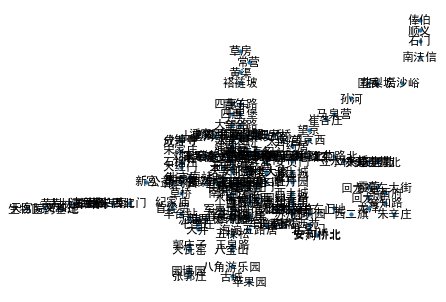

In [16]:
# 画图
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_info.keys()))
nx.draw(station_graph, station_info, with_labels=True, node_size=10)

+ 北京地铁站图


<img style="float:center;" src="./utils/map.jpg" width='70%'>

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [63]:
from collections import defaultdict

threshold = 6   # defined the threshold
def build_connection(station_info):
    station_connection = defaultdict(list)
    stations = list(station_info.keys())
    for c1 in stations:
        for c2 in stations:
            if c1 == c2 : continue
            
            if get_station_distance(c1,c2) < threshold:
                station_connection[c1].append(c2)
    return station_connection

station_connection = build_connection(station_info)

In [64]:
station_connection

defaultdict(list,
            {'苹果园': ['古城', '八角游乐园', '八宝山'],
             '古城': ['苹果园', '八角游乐园', '八宝山', '玉泉路', '张郭庄', '园博园'],
             '八角游乐园': ['苹果园', '古城', '八宝山', '玉泉路', '五棵松', '张郭庄', '园博园'],
             '八宝山': ['苹果园',
              '古城',
              '八角游乐园',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '海淀五路居',
              '慈寿寺',
              '大瓦窑',
              '郭庄子',
              '大井',
              '西钓鱼台'],
             '玉泉路': ['古城',
              '八角游乐园',
              '八宝山',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '海淀五路居',
              '慈寿寺',
              '花园桥',
              '大瓦窑',
              '郭庄子',
              '大井',
              '七里庄',
              '车道沟',
              '西钓鱼台',
              '莲花桥',
              '六里桥'],
             '五棵松': ['八角游乐园',
              '八宝山',
              '玉泉路',
              '万寿路',
              '公主坟',
            

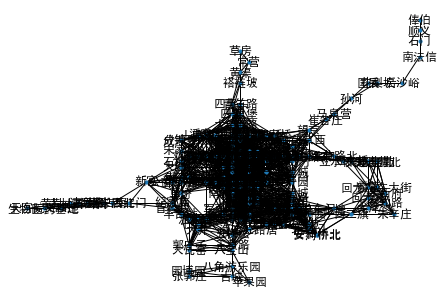

In [65]:
station_connection_graph = nx.Graph(station_connection)
nx.draw(station_connection_graph, station_info,with_labels=True,node_size=10)

In [66]:
def BFS_search(graph, start, destination,search_strategy):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        print(path)
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
        if froniter == destination:# #检查目的地是不是已经搜索到了
            return path
            
        successsors = graph[froniter]
        
        for station in successsors:      #遍历子节点
            if station in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[station]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter)

In [67]:
# 对站点距离进行排序
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)


In [68]:
path = BFS_search(station_connection,"顺义","崔各庄",search_strategy=sort_by_distance)
path

['顺义']
['顺义', '石门']
['顺义', '俸伯']
['顺义', '南法信']
['顺义', '石门', '南法信']
['顺义', '石门', '俸伯']
['顺义', '俸伯', '石门']
['顺义', '南法信', '石门']
['顺义', '俸伯', '南法信']
['顺义', '南法信', '后沙峪']
['顺义', '南法信', '俸伯']
['顺义', '南法信', '后沙峪', '花梨坎']
['顺义', '南法信', '后沙峪', '国展']
['顺义', '南法信', '后沙峪', '花梨坎', '国展']
['顺义', '南法信', '后沙峪', '国展', '花梨坎']
['顺义', '南法信', '后沙峪', '花梨坎', '孙河']
['顺义', '南法信', '后沙峪', '国展', '孙河']
['顺义', '南法信', '后沙峪', '花梨坎', '孙河', '国展']
['顺义', '南法信', '后沙峪', '花梨坎', '孙河', '马泉营']
['顺义', '南法信', '后沙峪', '花梨坎', '孙河', '崔各庄']


['顺义', '南法信', '后沙峪', '花梨坎', '孙河', '崔各庄']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 